## V. Further numerical experiments

Marc Rodriguez Salazar

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# values

R = 1e-6 # radius (m)
T= 300 # temperature (K)
eta= 0.001 # viscosity (Nsm^-2)
tau= 0.6e-6 # momentum relaxation time (s)
gamma= 6*np.pi*eta*R # friction coefficient (kg/s)

KB= 1.38e-23 # Boltzmann cnt (J/K)

D= KB*T/gamma # diffusion coefficient (m^2/s)

kx=1e-6 # stiffnesses of the trap (N/m)
ky=1e-6 # stiffnesses of the trap (N/m)
kz=0.2e-6 # stiffnesses of the trap (N/m)

#### Probability distribution of an optically trapped particle shifts in response to an external force

In [3]:
Dt=1e-3 # time step (s)

In [4]:
N = int(1e+6)

In [5]:
Fc= 200e-15 # Constant force (N)

In [6]:
def heaviside(t):
    if t>=0:
        return 1.0
    else:
        return 0.0

In [7]:
heaviside(4)

1.0

In [8]:
heaviside(-1)

0.0

In [9]:
time=np.linspace(-10, 10, N)

In [10]:
x= np.zeros(N)
x[0] = 0

wx = np.random.normal(0, 1, N)

for i in range(1, N):
    h = heaviside(time[i])
    x[i]=x[i-1] -1/gamma *kx* Dt* x[i-1] +1/gamma*Fc*h*Dt+ np.sqrt(2*D*Dt)*wx[i]

In [11]:
x_before = x[time < 0]*1e9
x_after  = x[time > 0]*1e9

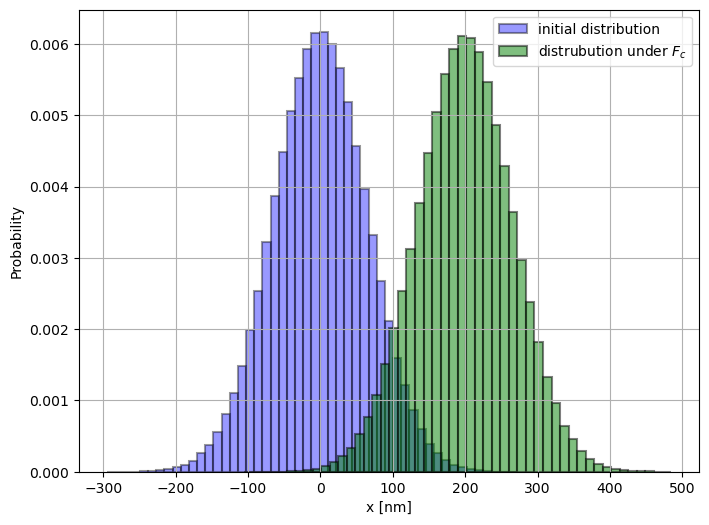

In [12]:
plt.figure(figsize=(8, 6))

plt.hist(x_before, density=True, bins=50, color='blue', alpha=0.4, label='initial distribution', edgecolor='black', linewidth=1.5)
plt.hist(x_after, density=True, bins=50, color='green', alpha=0.5, label='distrubution under $F_c$', edgecolor='black', linewidth=1.5)

plt.xlabel('x [nm]')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)

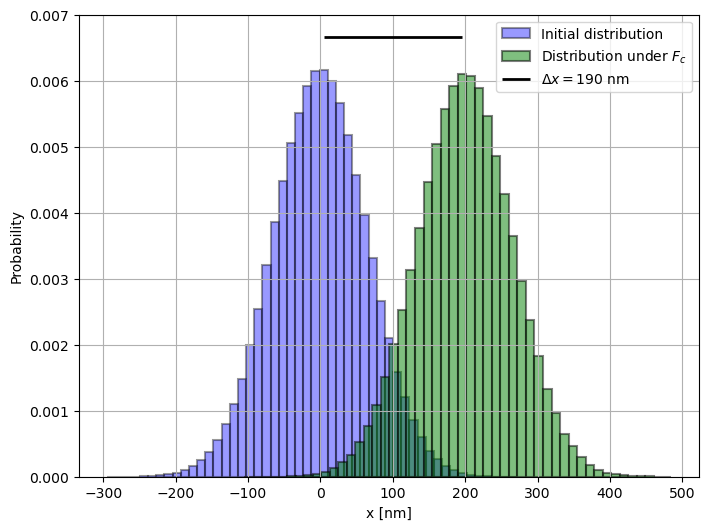

In [13]:
counts_before, bins_before = np.histogram(x_before, bins=50, density=True)
counts_after, bins_after = np.histogram(x_after, bins=50, density=True)

centers_before = 0.5 * (bins_before[1:] + bins_before[:-1])
centers_after = 0.5 * (bins_after[1:] + bins_after[:-1])

x_max_before = centers_before[np.argmax(counts_before)]
x_max_after = centers_after[np.argmax(counts_after)]

delta_x = x_max_after - x_max_before

plt.figure(figsize=(8, 6))

plt.hist(x_before, density=True, bins=50, color='blue', alpha=0.4, label='Initial distribution', edgecolor='black', linewidth=1.5)
plt.hist(x_after, density=True, bins=50, color='green', alpha=0.5, label='Distribution under $F_c$', edgecolor='black', linewidth=1.5)


y_line = max(max(counts_before), max(counts_after)) + 0.0005  
plt.hlines(y=y_line, xmin=x_max_before, xmax=x_max_after, color='black', linewidth=2, label=fr'$\Delta x = {int(delta_x)}$ nm')

plt.annotate(r'$\Delta x$', 
             xy=((x_max_before + x_max_after)/2, y_line + 0.002), 
             ha='center', fontsize=12, color='red')

plt.xlabel('x [nm]')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)

#### Position correlation function

In [14]:
N = int(5e+5)

In [15]:
Dt=1e-5 # time step (s)

In [16]:
omega= 132.6 # rotational comopnent (s^-1)

In [17]:
def acf(x,y, Dt):

    r_full = np.correlate(x, y, mode='full') / len(x)
    
    mid = len(r_full) // 2  # the mean value corresponds to t=0
    
    
    r = r_full / np.max(np.abs(r_full))  # normalize to 1

    t = Dt * (np.arange(-mid, mid + 1))  # time goes from -t_max a +t_max
    
    return r, t

In [18]:
time=np.linspace(-10, 10, N)

In [19]:
x= np.zeros(N)
x[0] = 0

y= np.zeros(N)
y[0] = 0

wx = np.random.normal(0, 1, N)
wy = np.random.normal(0, 1, N)


for i in range(1, N):
    h = heaviside(time[i])
    x[i]=x[i-1] -1/gamma *kx* Dt* x[i-1] -omega*y[i-1]*Dt+ np.sqrt(2*D*Dt)*wx[i]
    y[i]=y[i-1] -1/gamma *ky* Dt* y[i-1] +omega*x[i-1]*Dt+ np.sqrt(2*D*Dt)*wy[i]

In [20]:
r_xy, time_xy = acf(x,y, Dt)

In [21]:
r_x, time_x = acf(x,x, Dt)

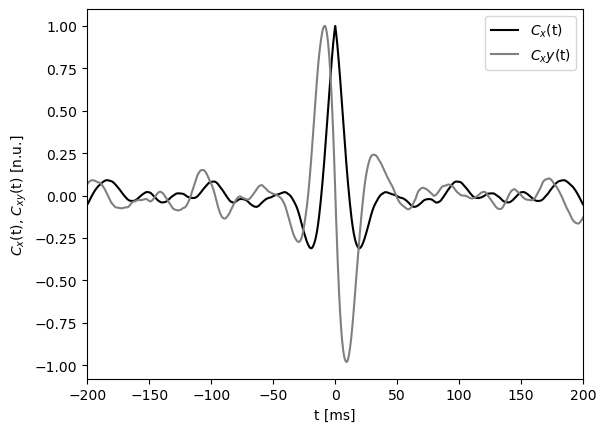

In [22]:
plt.plot(time_x*1000, r_x, 'black', label= r'$C_x$(t)')
plt.plot(time_xy*1000, r_xy, 'gray', label= r'$C_xy$(t)')

plt.xlabel('t [ms]')
plt.ylabel(r'$C_x$(t), $C_{xy}$(t) [n.u.]')

plt.xlim(-200,200)
plt.legend()

#### Dynamic transitions between the two equilibrium positions

In [23]:
N = int(1e+5)

In [24]:
Dt=1e-4 # time step (s)

In [25]:
# F=-ax^3+bx

a= 1e7 # N/m^3
b= 1e-6 #N/m

In [26]:
time = np.linspace(0, 200, N) 

Text(0, 0.5, 'x [nm]')

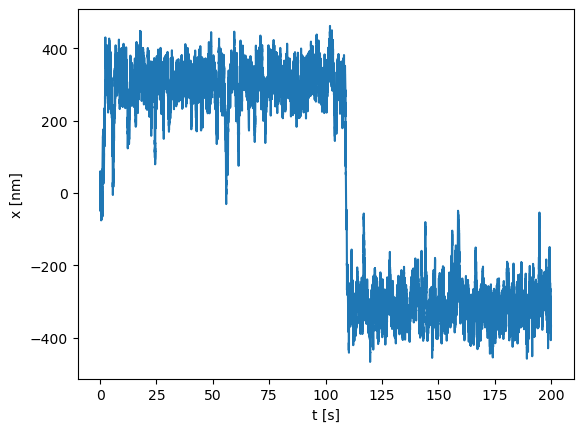

In [27]:
x= np.zeros(N)
x[0] = 0

wx = np.random.normal(0, 1, N)

for i in range(1, N):
    F= -a * x[i-1]**3 + b * x[i-1]
    x[i]=x[i-1]  +1/gamma*Dt*F+ np.sqrt(2*D*Dt)*wx[i]

plt.plot(time, x*1e9)
plt.xlabel('t [s]')
plt.ylabel('x [nm]')